In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
path=r'D:\Instacart Basket Analysis'

In [3]:
df_ords_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [4]:
df_ords_cust.head()

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Question 2

In [5]:
# drop columns and creat new df to df_ords_cust_clean
df_ords_cust_clean = df_ords_cust.drop(columns=['first_name', 'surname', 'date_joined', 'add_to_cart_order', 'aisle_id'])

In [7]:
df_ords_cust_clean.head()

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,reordered,product_name,department_id,...,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


In [14]:
df_ords_cust_clean.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered', 'days_since_prior_order', 'product_id', 'reordered',
       'product_name', 'department_id', 'prices', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'num_of_dependants',
       'marital_status', 'income', 'region'],
      dtype='object')

# Question 3

In [8]:
# Creat region colmn and set states as North West 
df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Maine","New Hampshire", "Vermont", "Massachusetts", 
            "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]), 'region'] = "Northeast"

C:\Users\goswa\AppData\Local\Temp\ipykernel_10248\483404182.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Maine","New Hampshire", "Vermont", "Massachusetts",


In [9]:
# creat region as west
df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Idaho", "Montana", "Wyoming", "Nevada", "Utah", 
            "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", 
            "Hawaii"]), 'region'] = "West"

In [10]:
# Creat region as Mid west 
df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", 
        "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]), 'region'] = "Midwest"

In [11]:
# Creat region as south 
df_ords_cust_clean.loc[df_ords_cust_clean['state'].isin(["Delaware", "Maryland", "District of Columbia", 
            "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", 
            "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]), 'region'] = "South"


In [12]:
# check for null
df_ords_cust_clean['region'].isnull().sum()

0

In [15]:
# unique users vs spending flag
region_spender_type = df_ords_cust_clean.groupby(['region','spending_flag'], as_index=False).agg({'user_id': 'nunique'})
region_spender_type.to_clipboard()

C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 1.0, 'Spending of Customers Across Regions')

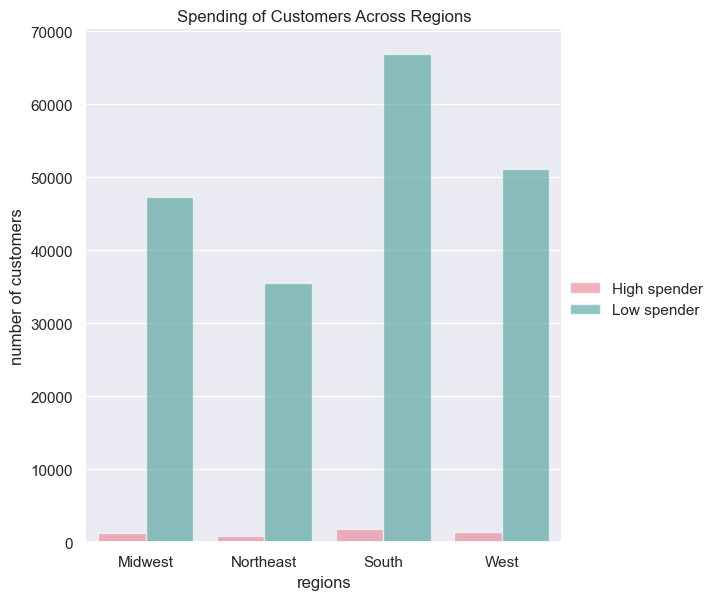

In [16]:
#bar chart for spending flag
sns.set_theme()

bar_region_spender = sns.catplot(
    data=region_spender_type, kind="bar",
    x="region", y="user_id", hue="spending_flag", palette="husl", alpha=.6, height=6
)
bar_region_spender.despine(left=True)
bar_region_spender.set_axis_labels("regions", "number of customers")
bar_region_spender.legend.set_title("")
plt.title("Spending of Customers Across Regions")

In [17]:
# Most customers are form south, no state has a large number of high spenders, and high spenders varry slightly form region to region. 

In [19]:
bar_region_spender.savefig(os.path.join(path,'Visuals/bar_reg_spend.png'))

# Question 4

In [21]:
df_ords_cust_clean.loc[(df_ords_cust_clean['max_order'] < 5), 'activity_type'] = "Low activity"
df_ords_cust_clean.loc[(df_ords_cust_clean['max_order'] >= 5), 'activity_type'] = "High activity"

C:\Users\goswa\AppData\Local\Temp\ipykernel_10248\2790999606.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_cust_clean.loc[(df_ords_cust_clean['max_order'] < 5), 'activity_type'] = "Low activity"


In [22]:
df_ords_cust_clean['activity_type'].value_counts(dropna=False)

activity_type
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [23]:
df_high_active_cust = df_ords_cust_clean.loc[(df_ords_cust_clean['activity_type'] == "High activity")]

In [24]:
df_high_active_cust.to_pickle(os.path.join(path, 'Data/Prepared Data/high_active_cust.pkl'))

# Question 5

In [27]:
df_ords_cust_clean['marital_status'].value_counts(dropna=False)

marital_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [9]:
def create_customer_profile(row):
    # Additional condition for 'Young Parent' based on 'department_id'
    if row['department_id'] == 18:
        return 'Young Parent'
    elif row['age'] < 30 and row['num_of_dependants'] == 0:
        return 'Single Adult'
    elif row['age'] >= 30 and row['num_of_dependants'] > 0:
        return 'Young Parent'
    else:
        return 'Other'

In [ ]:
# Apply the function to create the 'customer_profile' column
df_ords_cust_clean['customer_profile'] = df_ords_cust_clean.apply(create_customer_profile, axis=1)

# Display the DataFrame with the new 'customer_profile' column
print(df_ords_cust_clean[['customer_profile']])


In [7]:
df_ords_cust_clean.head()

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,reordered,product_name,department_id,...,average_price,spending_flag,median_orders,order_frequency_flag,gender,state,age,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,Soda,7,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


In [ ]:
print(df_ords_cust_clean.columns)

# Question 6

In [6]:
profile_counts = df_ords_cust_clean['customer_profile'].value_counts()

# Plotting the distribution using a bar chart
plt.figure(figsize=(10, 6))
profile_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

KeyError: 'customer_profile'